In [1]:
# 📊 ECG from Phase Visualizations Notebook
import numpy as np
import matplotlib.pyplot as plt

# ✅ Function for ECG from Phase
def ecg_gen_from_phase(params, phase):
    """ Synthetic ECG from Gaussian Mixture Model (GMM). """
    if isinstance(params, dict):
        alpha = np.array(params['alpha'])
        b = np.array(params['b'])
        theta = np.array(params['theta'])
    else:
        L = len(params) // 3
        alpha = np.array(params[:L])
        b = np.array(params[L:2 * L])
        theta = np.array(params[2 * L:])

    x = np.zeros_like(phase)

    for j in range(len(alpha)):
        dtheta = (phase - theta[j] + np.pi) % (2 * np.pi) - np.pi
        x += alpha[j] * np.exp(-dtheta**2 / (2 * b[j]**2))

    return x

In [2]:
# ✅ Parameters
N = 1000
fs = 500
t = np.arange(N) / fs
phi = 2 * np.pi * 1.2 * t  # Phase signal

# ✅ GMM parameters
alpha = np.array([1.0, 0.8, 0.5])
b = np.array([0.1, 0.15, 0.2])
theta = np.array([0, np.pi / 2, np.pi])

# ✅ Generate ECG from Phase
ecg = ecg_gen_from_phase({'alpha': alpha, 'b': b, 'theta': theta}, phi)

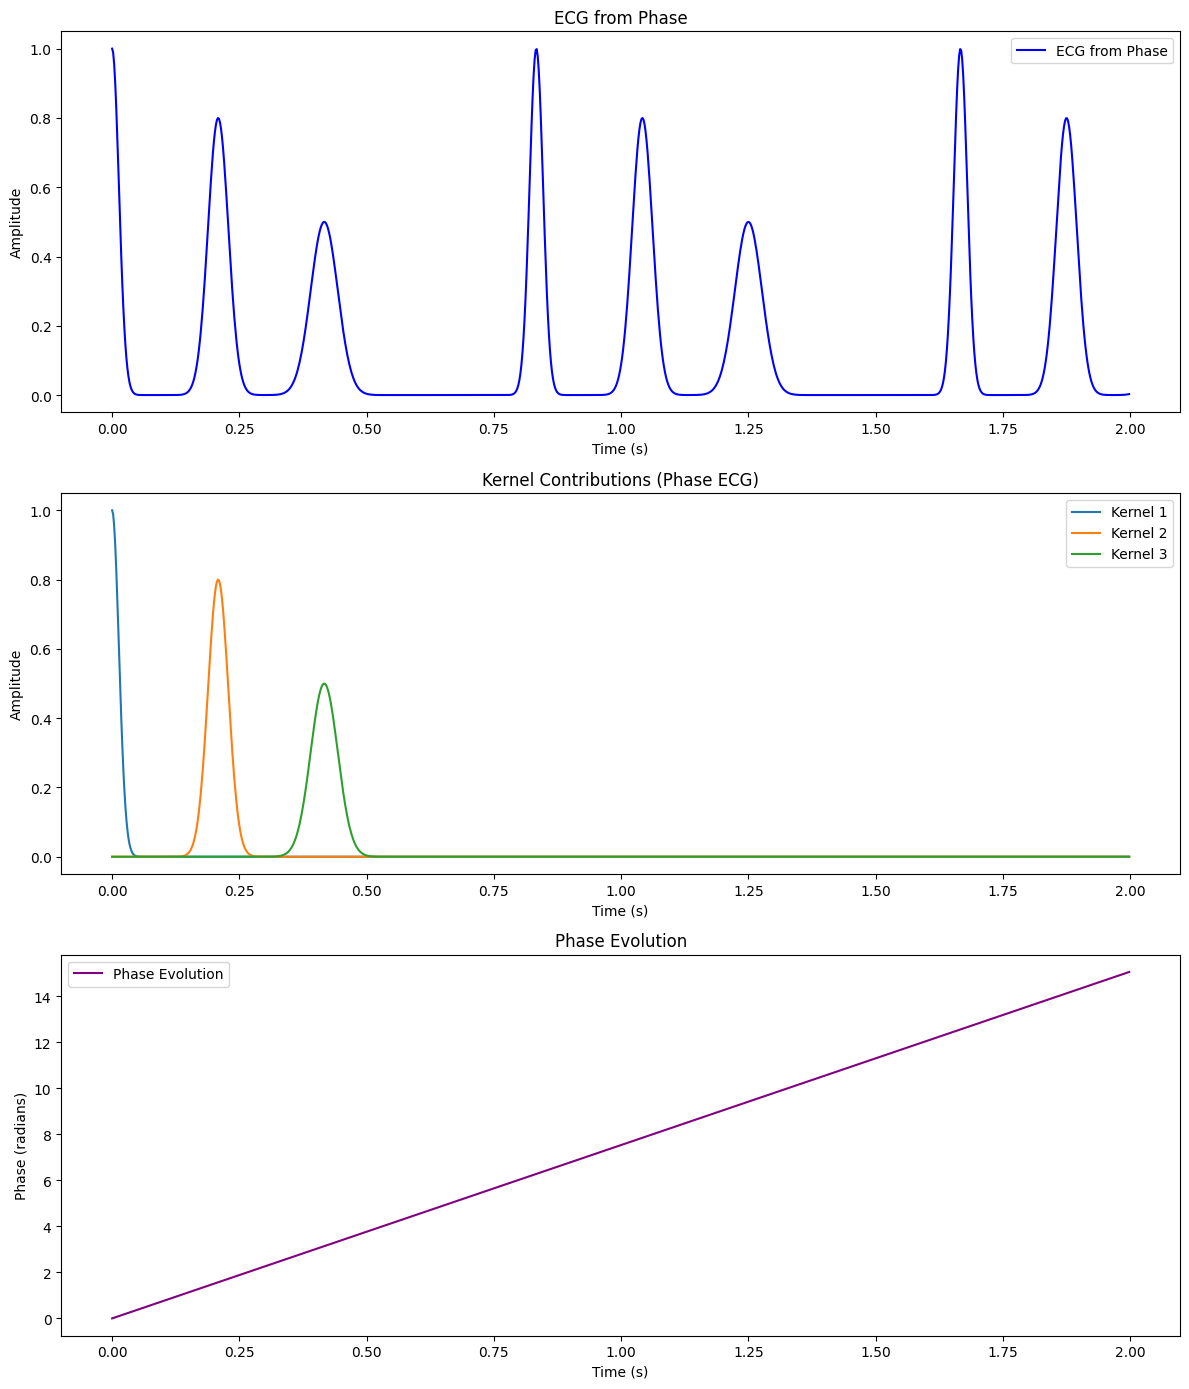

In [3]:
# ✅ Visualization
fig, axs = plt.subplots(3, 1, figsize=(12, 14))

# 🚀 Plot 1: ECG from Phase
axs[0].plot(t, ecg, label='ECG from Phase', color='blue')
axs[0].set_title('ECG from Phase')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')
axs[0].legend()

# 🚀 Plot 2: Individual Kernel Contributions
for i in range(len(alpha)):
    kernel = alpha[i] * np.exp(-(phi - theta[i])**2 / (2 * b[i]**2))
    axs[1].plot(t, kernel, label=f'Kernel {i+1}')
axs[1].set_title('Kernel Contributions (Phase ECG)')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

# 🚀 Plot 3: Phase Evolution
axs[2].plot(t, phi, label='Phase Evolution', color='purple')
axs[2].set_title('Phase Evolution')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Phase (radians)')
axs[2].legend()

plt.tight_layout()
plt.show()